In [2]:
install.packages('circlize')

also installing the dependency ‘GlobalOptions’




In [3]:
install.packages('chorddiag')

Warning message:
“package ‘chorddiag’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [6]:
data

,Africa,East Asia,Europe,Latin Ame.,North Ame.,Oceania,South Asia,South East Asia,Soviet Union,West.Asia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,3.142471,0.000000,2.107883,0.000000,0.540887,0.155988,0.000000,0.000000,0.000000,0.673004
East Asia,0.000000,1.630997,0.601265,0.000000,0.973060,0.333608,0.000000,0.380388,0.000000,0.869311
Europe,0.000000,0.000000,2.401476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Latin Ame.,0.000000,0.000000,1.762587,0.879198,3.627847,0.000000,0.000000,0.000000,0.000000,0.000000
North Ame.,0.000000,0.000000,1.215929,0.276908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Oceania,0.000000,0.000000,0.170370,0.000000,0.000000,0.190706,0.000000,0.000000,0.000000,0.000000
South Asia,0.000000,0.525881,1.390272,0.000000,1.508008,0.347420,1.307907,0.000000,0.000000,4.902081
South East Asia,0.000000,0.145264,0.468762,0.000000,1.057904,0.278746,0.000000,0.781316,0.000000,0.000000
Soviet Union,0.000000,0.000000,0.609230,0.000000,0.000000,0.000000,0.000000,0.000000,1.870501,0.000000


Note: The second link end is drawn out of sector 'Europe'.

Note: The second link end is drawn out of sector 'South East Asia'.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

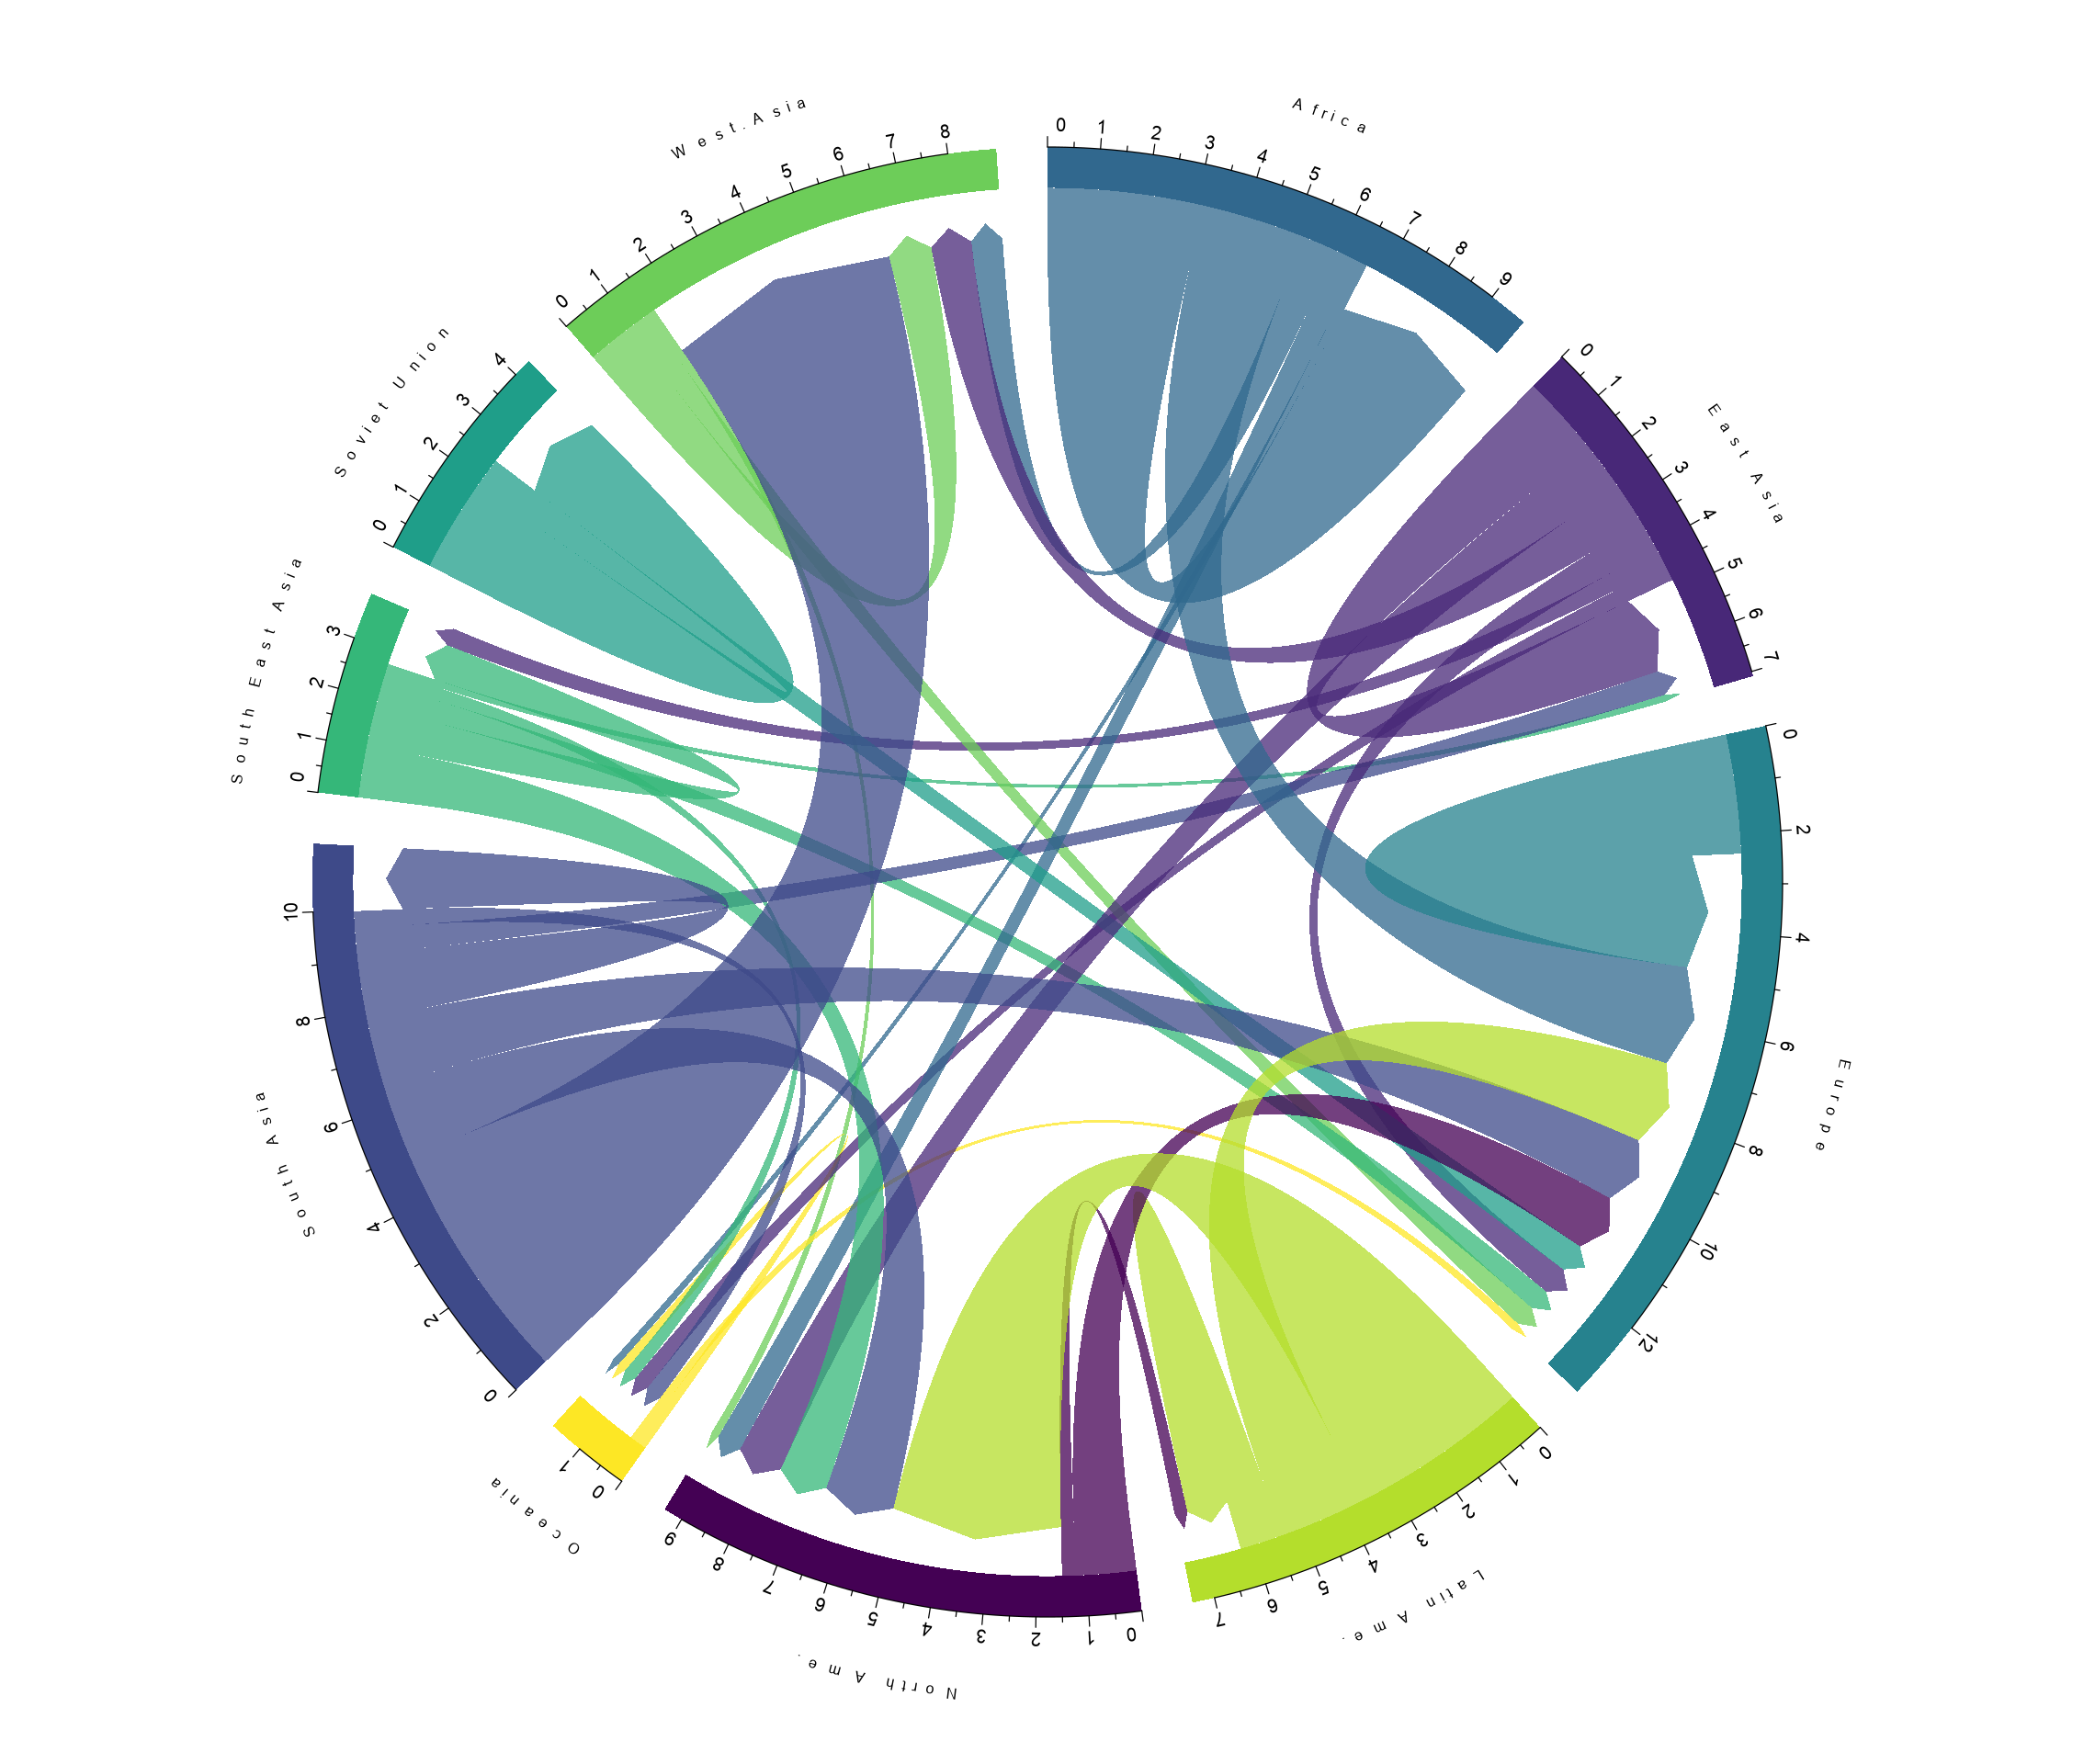

In [7]:
# Libraries
library(tidyverse)
library(viridis)
library(patchwork)
library(hrbrthemes)
library(circlize)
library(chorddiag)  #devtools::install_github("mattflor/chorddiag")

options(repr.plot.width=19, repr.plot.height=16)


# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/13_AdjacencyDirectedWeighted.csv", header=TRUE)

# short names
colnames(data) <- c("Africa", "East Asia", "Europe", "Latin Ame.",   "North Ame.",   "Oceania", "South Asia", "South East Asia", "Soviet Union", "West.Asia")
rownames(data) <- colnames(data)

# I need a long format
data_long <- data %>%
  rownames_to_column %>%
  gather(key = 'key', value = 'value', -rowname)

# parameters
circos.clear()
circos.par(start.degree = 90, gap.degree = 4, track.margin = c(-0.1, 0.1), points.overflow.warning = FALSE)
par(mar = rep(0, 4))

# color palette
mycolor <- viridis(10, alpha = 1, begin = 0, end = 1, option = "D")
mycolor <- mycolor[sample(1:10)]

# Base plot
chordDiagram(
  x = data_long, 
  grid.col = mycolor,
  transparency = 0.25,
  directional = 1,
  direction.type = c("arrows", "diffHeight"), 
  diffHeight  = -0.04,
  annotationTrack = "grid", 
  annotationTrackHeight = c(0.05, 0.1),
  link.arr.type = "big.arrow", 
  link.sort = TRUE, 
  link.largest.ontop = TRUE)

# Add text and axis
circos.trackPlotRegion(
  track.index = 1, 
  bg.border = NA, 
  panel.fun = function(x, y) {
    
    xlim = get.cell.meta.data("xlim")
    sector.index = get.cell.meta.data("sector.index")
    
    # Add names to the sector. 
    circos.text(
      x = mean(xlim), 
      y = 3.2, 
      labels = sector.index, 
      facing = "bending", 
      cex = 0.8
      )

    # Add graduation on axis
    circos.axis(
      h = "top", 
      major.at = seq(from = 0, to = xlim[2], by = ifelse(test = xlim[2]>10, yes = 2, no = 1)), 
      minor.ticks = 1, 
      major.tick.percentage = 0.5,
      labels.niceFacing = FALSE)
  }
)

In [ ]:
install.packages('circlize')

also installing the dependency ‘GlobalOptions’


